In [3]:
import numpy as np
import pint

In [13]:
unit = pint.UnitRegistry()
# from observations
DATA = {
    "RED_LIGHT_DATA": {
        "wavelength": 6040 * unit.angstrom, # given
        "L": (54.7+1.4) * unit.cm,
        "Delta-X_min": 0.6 * unit.cm,
        "Delta-X_max": 1.5 * unit.cm,
    },
    "GREEN_LIGHT_DATA": {
        "wavelength": 5592 * unit.angstrom, # given 
        "L": (54.7+1.4) * unit.cm,
        "Delta-X_min": 0.5 * unit.cm,
        "Delta-X_max": 1.5 * unit.cm,
    },
}

### The $d$ seperation of syncronized sources relation between $\Delta x$, $L$ and $\lambda$: 

$$\Delta x = \lambda \frac{L}{d}$$
$$d = \lambda \frac{L}{\Delta x }$$


In [14]:
def calculate_seperation_d(delta_x, wavelength, L):
    """
    Calculate the separation distance 'd' using the formula:
    d = (wavelength * L) / delta_x
    """
    d = (wavelength * L) / delta_x
    return d.to(unit.mm)

In [21]:
d_values = {}
for i in DATA:
    data = DATA[i]
    wavelength = data["wavelength"]
    L = data["L"]
    Delta_X_average = (data["Delta-X_min"]+data["Delta-X_max"]) / 2
 
    d = calculate_seperation_d(Delta_X_average, wavelength, L)

    d_values["d_"+i] = d
    print(f"{i}:")
    print(f"  d: {d.to(unit.nm)}")

RED_LIGHT_DATA:
  d: 32270.857142857138 nanometer
GREEN_LIGHT_DATA:
  d: 31371.12 nanometer


In [17]:
d_values

{'d_RED_LIGHT_DATA': <Quantity(0.0322708571, 'millimeter')>,
 'd_GREEN_LIGHT_DATA': <Quantity(0.03137112, 'millimeter')>}

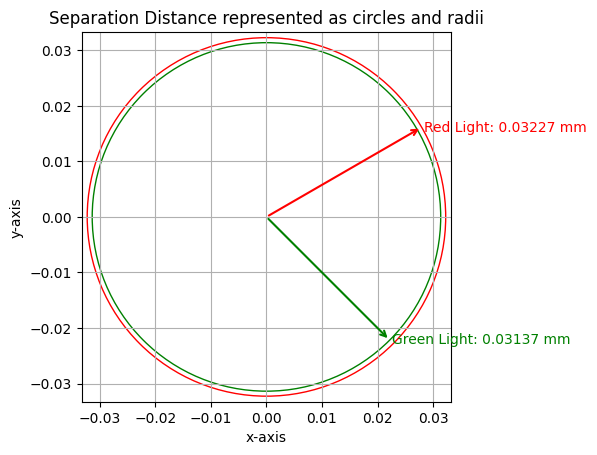

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

d1, d2 = d_values["d_RED_LIGHT_DATA"].magnitude, d_values["d_GREEN_LIGHT_DATA"].magnitude

# Circles
c1 = plt.Circle((0, 0), d1, color='red', linewidth=1, fill=False)
c2 = plt.Circle((0, 0), d2, color='green', linewidth=1, fill=False)
ax.add_artist(c1)
ax.add_artist(c2)

# Arrows for radii (angled to avoid overlap)

ax.annotate('', xy=(d1 * 0.866, d1 * 0.5), xytext=(0, 0),  # 30 degrees for red
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5))
ax.annotate('', xy=(d2 * 0.707, -d2 * 0.707), xytext=(0, 0),  # -45 degrees for green
            arrowprops=dict(arrowstyle='->', color='green', lw=1.5))

# Labels for radii
c1_label = f"Red Light: {d1:.5f} mm"
c2_label = f"Green Light: {d2:.5f} mm"
ax.text(d1 * 0.866 + 0.0005, d1 * 0.5, c1_label, color='red', fontsize=10, verticalalignment='center')
ax.text(d2 * 0.707 + 0.0005, -d2 * 0.707, c2_label, color='green', fontsize=10, verticalalignment='center')

# Formatting
ax.set_xlim(-d1 - 0.001, d1 + 0.001)
ax.set_ylim(-d1 - 0.001, d1 + 0.001)
ax.set_aspect('equal', adjustable='box')
plt.title("Separation Distance represented as circles and radii")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid()
plt.show()

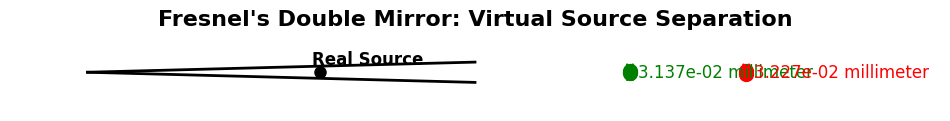

In [ ]:
def draw_fresnel_double_mirror(d_green, d_red):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect('equal')
    ax.set_title("Fresnel's Double Mirror: Virtual Source Separation", fontsize=16, fontweight='bold')

    # Mirror lines (angled slightly)
    angle_deg = 1.5
    L = 5
    angle_rad = np.radians(angle_deg)
    mirror1 = [[-L, 0], [0, L * np.tan(angle_rad)]]
    mirror2 = [[-L, 0], [0, -L * np.tan(angle_rad)]]

    ax.plot(*zip(*mirror1), color='black', linewidth=2, label='Mirror 1')
    ax.plot(*zip(*mirror2), color='black', linewidth=2, label='Mirror 2')

    # Real source
    ax.plot([-2], [0], 'ko', markersize=8, label='Real Source')
    ax.text(-2.1, 0.1, 'Real Source', fontsize=12, fontweight='bold')

    # Virtual sources for green and red
    ax.plot([2], [d_green.magnitude / 2], 'go', markersize=10, label=f'Virtual Source (Green) d = {d_green:.5f}')
    ax.plot([2], [-d_green.magnitude / 2], 'go', markersize=10)

    ax.plot([3.5], [d_red.magnitude / 2], 'ro', markersize=10, label=f'Virtual Source (Red) d = {d_red:.5f}')
    ax.plot([3.5], [-d_red.magnitude / 2], 'ro', markersize=10)

    # Labels and visual aids
    ax.annotate('', xy=(2, d_green.magnitude / 2), xytext=(2, -d_green.magnitude / 2),
                arrowprops=dict(arrowstyle='<->', color='green', lw=2))
    ax.annotate('', xy=(3.5, d_red.magnitude / 2), xytext=(3.5, -d_red.magnitude / 2),
                arrowprops=dict(arrowstyle='<->', color='red', lw=2))

    ax.text(2.1, 0, f"{d_green.magnitude:.3e} {d_green.units}", color='green', fontsize=12, verticalalignment='center')
    ax.text(3.6, 0, f"{d_red.magnitude:.3e} {d_red.units}", color='red', fontsize=12, verticalalignment='center')

    # Formatting
    ax.set_xlim(-6, 6)
    ax.set_ylim(-0.5, 0.5)
    ax.axis('off')
    plt.show()

# Replace d_green and d_red with your measured values (as pint.Quantity)
draw_fresnel_double_mirror(d_green=d_values["d_GREEN_LIGHT_DATA"], d_red=d_values["d_RED_LIGHT_DATA"])
